## Nifty50 MARKET TREND ANALYSIS 

In this analysis we want to see the overall trend or historic performance of Nifty50 in last 30 years and later we can compare it to how tech has influended market in the last 30 years. In this analysis we will try to find the answer to the following questions:
- 1. What is the overall trend of Nifty50 in last 30 years?
- 2. What are the yearly return of the Nifty50 over last 30 years?
- 3. How did the major technological milestones such as rise of internet, AI affected Nifty50 ?



### 1. What is the overall trend of Nifty50 in last 30 years?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates


##### Because of yfinance not have more historical data of nifty50 we need to download data from investing.com and use as .csv mode.

In [3]:
# Read Nifty50 historical data (last 30 years)

nifty50_df = pd.read_csv('nifty_data.csv')
nifty50_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,01-01-1996,908.01000,913.11000,913.11000,906.15000,0,0,0
1,02-01-1996,900.38000,906.78000,906.78000,899.52000,0,0,0
2,03-01-1996,895.96000,901.66000,904.48000,895.48000,0,0,0
3,04-01-1996,889.67000,891.37000,891.37000,884.10000,0,0,0
4,05-01-1996,884.73000,887.79000,887.79000,881.74000,0,0,0
...,...,...,...,...,...,...,...,...
7182,17-01-2025,23277.09961,23292.09961,23100.34961,23203.19922,272900,0,0
7183,20-01-2025,23290.40039,23391.09961,23170.65039,23344.75000,301500,0,0
7184,21-01-2025,23421.65039,23426.30078,22976.84961,23024.65039,312900,0,0
7185,22-01-2025,23099.15039,23169.55078,22981.30078,23155.34961,276000,0,0


In [4]:
nifty50_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7187 entries, 0 to 7186
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          7187 non-null   object 
 1   Open          7187 non-null   float64
 2   High          7187 non-null   float64
 3   Low           7187 non-null   float64
 4   Close         7187 non-null   float64
 5   Volume        7187 non-null   int64  
 6   Dividends     7187 non-null   int64  
 7   Stock Splits  7187 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 449.3+ KB


Most visualization libraries like Matplotlib, Seaborn, and Plotly require numeric data for plotting.

If a column contains strings (object dtype) instead of numbers, plotting functions might fail or produce incorrect graphs.

In [5]:
# for ploting we need to check the columns data types it's most imporatant thing.

nifty50_df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

#### so here we see that date is in object form so we need to change it in datetime format


In [6]:
# change dtype of date
nifty50_df['Date'] = pd.to_datetime(nifty50_df['Date'], format='%d-%m-%Y', errors='coerce')
nifty50_df.dtypes
 

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends                int64
Stock Splits             int64
dtype: object

### Plot the Nifty50  last 30 year trend

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


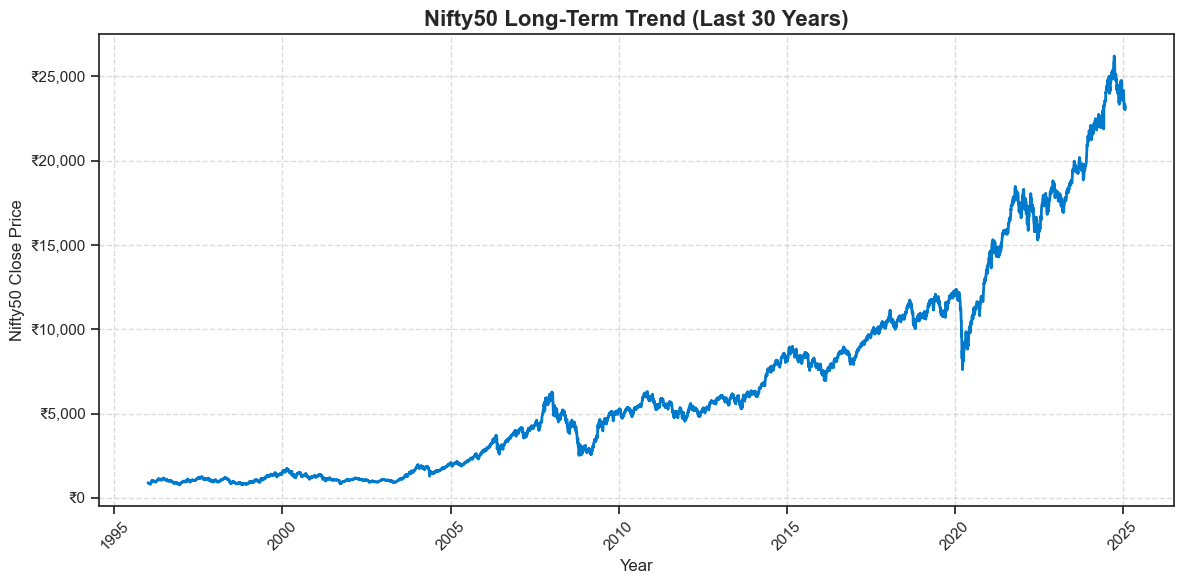

In [7]:
sns.set_theme(style='ticks')

fig, ax = plt.subplots(figsize = (12, 6))

# Plot the data
sns.lineplot(data=nifty50_df, x='Date',y='Close',ax=ax, linewidth=2, color='#007acc')

ax.set_title('Nifty50 Long-Term Trend (Last 30 Years)', fontsize=16,fontweight='bold')
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Nifty50 Close Price', fontsize=12)

# Format x-axis to show years only
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))  # Show year only
ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(5)) # 5 year range gap

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# add $ sign to y axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x:,.0f}'))

# add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




### 2. What are the yearly return  of the Nify50 over last 30 years?

In [8]:
# calculate yearly returns
# change dtype of date
nifty50_df['Date'] = pd.to_datetime(nifty50_df['Date'], format='%d-%m-%Y', errors='coerce')
nifty50_df
 


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1996-01-01,908.01000,913.11000,913.11000,906.15000,0,0,0
1,1996-01-02,900.38000,906.78000,906.78000,899.52000,0,0,0
2,1996-01-03,895.96000,901.66000,904.48000,895.48000,0,0,0
3,1996-01-04,889.67000,891.37000,891.37000,884.10000,0,0,0
4,1996-01-05,884.73000,887.79000,887.79000,881.74000,0,0,0
...,...,...,...,...,...,...,...,...
7182,2025-01-17,23277.09961,23292.09961,23100.34961,23203.19922,272900,0,0
7183,2025-01-20,23290.40039,23391.09961,23170.65039,23344.75000,301500,0,0
7184,2025-01-21,23421.65039,23426.30078,22976.84961,23024.65039,312900,0,0
7185,2025-01-22,23099.15039,23169.55078,22981.30078,23155.34961,276000,0,0


In [9]:

# Extract the year from the 'Date' column
nifty50_df['Year'] = nifty50_df['Date'].dt.year
# Calculate yearly returns
nifty50_df['Yearly Return'] = nifty50_df['Close'].pct_change(252) * 100  # cause there are usually 252 trading days in a year

# Group by year and get the last closing price of each year
yearly_returns = nifty50_df.groupby('Year')['Yearly Return'].last()



In [10]:
yearly_returns

Year
1996          NaN
1997    28.412912
1998   -16.595925
1999    64.861848
2000   -12.446700
2001   -16.439020
2002     8.040972
2003    69.767229
2004     7.786295
2005    37.056889
2006    42.462230
2007    60.553437
2008   -48.467513
2009    74.461623
2010    18.245160
2011   -22.264345
2012    24.413496
2013     7.803064
2014    32.798365
2015    -2.609902
2016     5.460607
2017    33.160942
2018     3.816706
2019    12.759061
2020    14.175883
2021    26.218163
2022     5.964157
2023    19.409206
2024    11.794953
2025     5.013703
Name: Yearly Return, dtype: float64

In [11]:
# Create a df for returns
df_returns = yearly_returns.reset_index()
df_returns.columns = ['Year','Return']

# calculate cumulative returns
df_returns['Cumulative'] = (1 + df_returns['Return'] / 100).cumprod() - 1

#### Create the plot of yearly returns

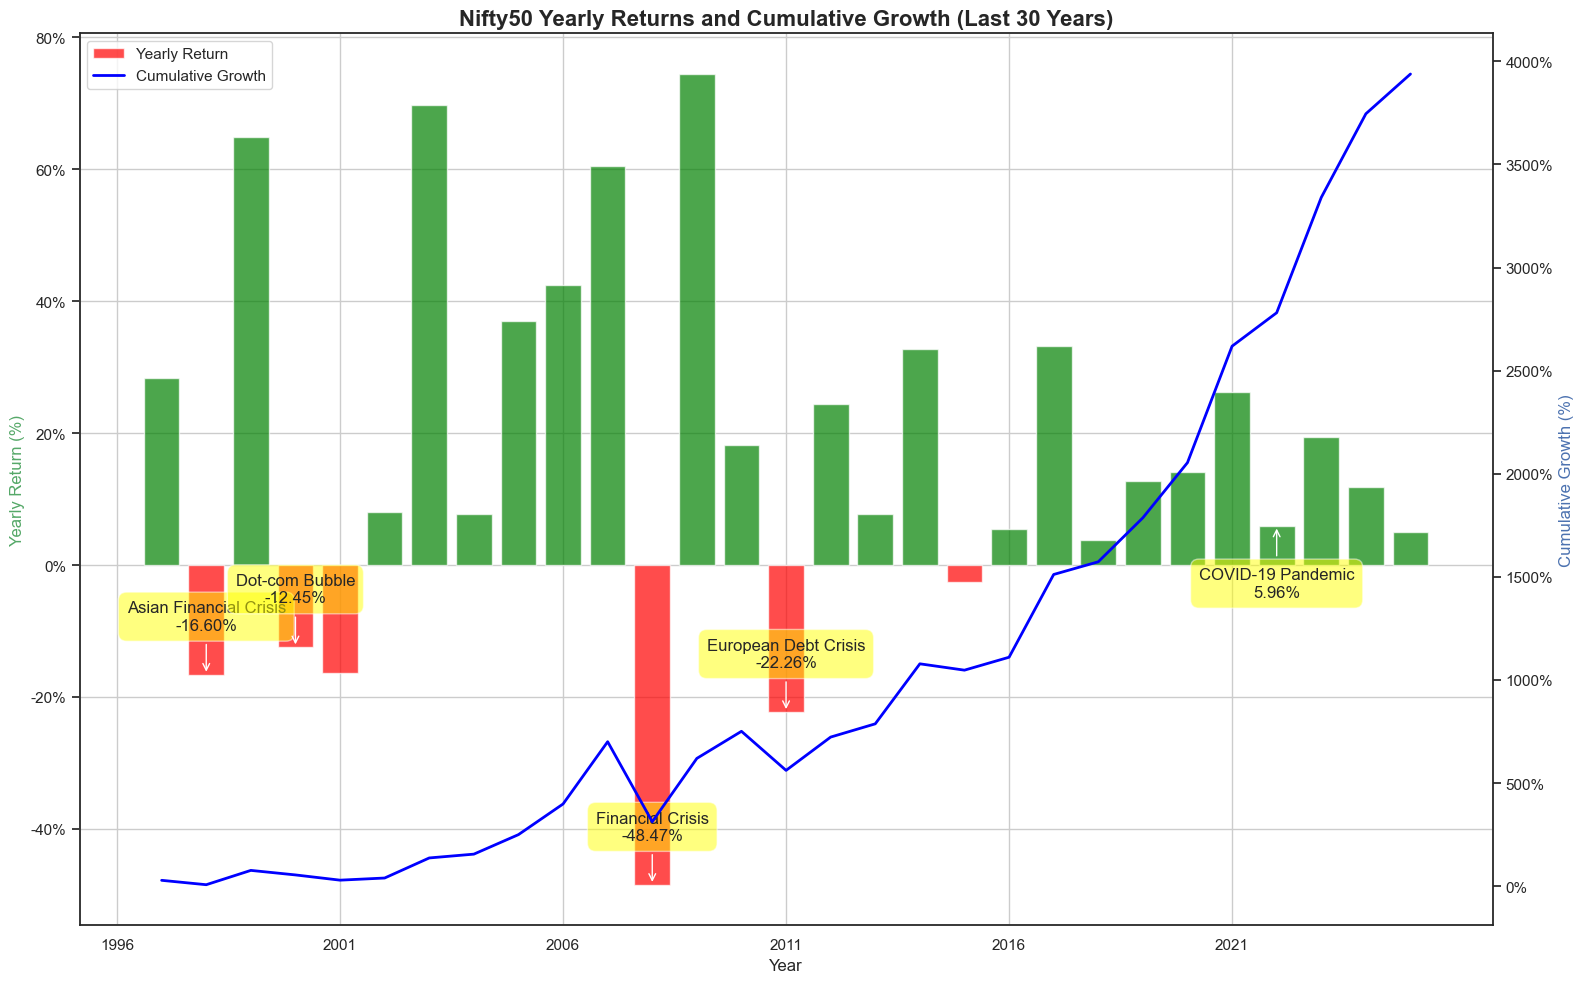

Average Annual Return: 17.09%
Best Year: 2009 (74.46%)
Worst Year: 2008 (-48.47%)
Positive Years: 23 (76.7%)
Negative Years: 6 (20.0%)
Total Cumulative Growth: 3938.83%


In [15]:
# Creating the plot
fig, ax1 = plt.subplots(figsize=(16, 10))

sns.set_style('white')

# Creating a bar plot for yearly returns
bars=ax1.bar(df_returns['Year'], df_returns['Return'], color=np.where(df_returns['Return'] >= 0, 'green', 'red'), alpha=0.7)

# Customize the primary y-axis (yearly returns)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Yearly Return (%)', fontsize=12, color='g')

# Creating a secondary y-axis for cumulative returns
ax2 = ax1.twinx()
ax2.plot(df_returns['Year'], df_returns['Cumulative'] * 100, color='blue', linewidth=2)
ax2.set_ylabel('Cumulative Growth (%)', fontsize=12, color='b')

plt.title('Nifty50 Yearly Returns and Cumulative Growth (Last 30 Years)', fontsize=16, fontweight='bold')

# Show every 5th year
plt.xticks(df_returns['Year'][::5])

# Customize y-axis formats
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))


# Defining major events
events = [
    (1998, "Asian Financial Crisis"),
    (2000, "Dot-com Bubble"),
    (2008, "Financial Crisis"),
    (2011, "European Debt Crisis"),
    (2022, "COVID-19 Pandemic")
]

# Add annotations for major events
for year, event in events:
    if year in df_returns['Year'].values:
        return_value = df_returns.loc[df_returns['Year'] == year, 'Return'].values[0]
        ax1.annotate(f"{event}\n{return_value:.2f}%", 
                     (year, return_value), 
                     xytext=(0, 30 if return_value < 0 else -30),
                     textcoords="offset points", 
                     ha='center', 
                     va='bottom' if return_value < 0 else 'top',
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Add legend
ax1.legend([bars, ax2.get_lines()[0]], ['Yearly Return', 'Cumulative Growth'], loc='upper left')

plt.tight_layout()
plt.show()

# Summary statistics
max_year = df_returns.loc[df_returns['Return'].idxmax(), 'Year']
min_year = df_returns.loc[df_returns['Return'].idxmin(), 'Year']
print(f"Average Annual Return: {df_returns['Return'].mean():.2f}%")
print(f"Best Year: {max_year} ({df_returns['Return'].max():.2f}%)")
print(f"Worst Year: {min_year} ({df_returns['Return'].min():.2f}%)")
print(f"Positive Years: {(df_returns['Return'] > 0).sum()} ({(df_returns['Return'] > 0).mean()*100:.1f}%)")
print(f"Negative Years: {(df_returns['Return'] < 0).sum()} ({(df_returns['Return'] < 0).mean()*100:.1f}%)")
print(f"Total Cumulative Growth: {df_returns['Cumulative'].iloc[-1]*100:.2f}%")


The 1998 Asian financial crisis, 2000 dot-com bubble, 2008 housing creash but in 2022 covid-19 pandemic market slightly recovr from downside, can be clearly seen through the graph.

### 3. How did the major technological milestones such as rise of internet, smartphones, AI affected nifty50?

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


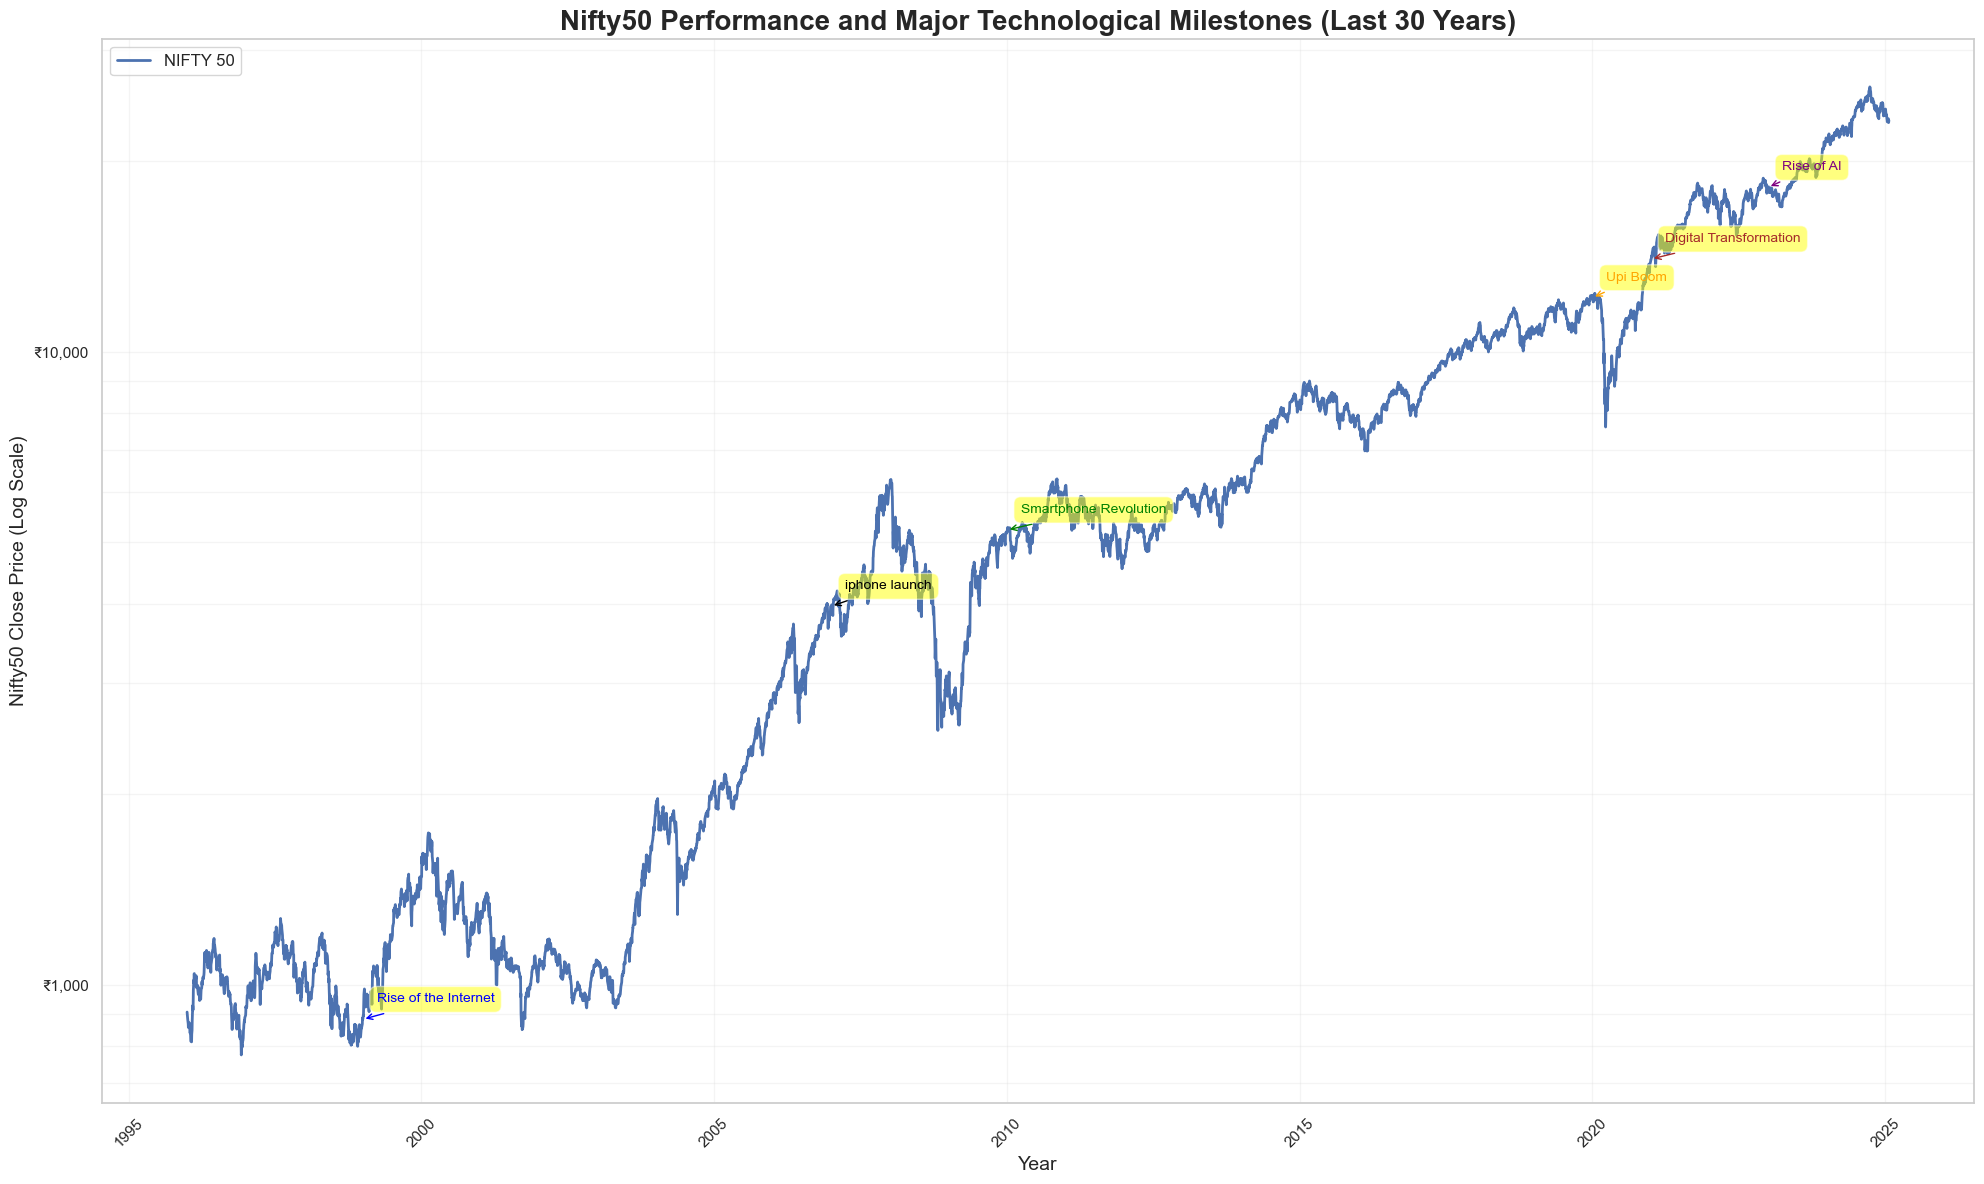

Starting Value: ₹906.15
Ending Value: ₹23205.35
Total Growth: ₹2460.87%


In [13]:
sns.set_style('whitegrid')
sns.set_palette('deep')

# Creating the plot
plt.figure(figsize=(20, 12))
ax = sns.lineplot(x=nifty50_df['Date'], y=nifty50_df['Close'], linewidth=2)

# Set y-axis to logarithmic scale to display growth more evenly accross entire time period
ax.set_yscale('log')

# Customize the plot
plt.title('Nifty50 Performance and Major Technological Milestones (Last 30 Years)', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Nifty50 Close Price (Log Scale)', fontsize=14)


# Defining major technological milestones

milestones = [
     (1999, 'Rise of the Internet', 'blue'),
     (2007,'iphone launch', 'black'),
     (2010, 'Smartphone Revolution', 'green'),
     (2020,'Upi Boom','orange'),
     (2021, 'Digital Transformation', 'brown'),
     (2023, 'Rise of AI', 'purple')
             
]


# Plotting technological milestones on the S&P 500 graph
for year, event, color in milestones:
    if year in nifty50_df['Date'].dt.year:
        price = nifty50_df.loc[nifty50_df['Date'].dt.year == year, 'Close'].values[0]
        plt.annotate(event, (mdates.date2num(pd.Timestamp(f'{year}-01-01')), price), xytext=(10, 10), 
                     textcoords='offset points', ha='left', va='bottom',
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color=color),
                     fontsize=10, color=color)


# Customizing x-axis to show ticks every 5 years
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Customizing y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x:,.0f}'))

# Adding gridlines
plt.grid(True, which="both", ls="-", alpha=0.2)

# Adding a legend
plt.legend(['NIFTY 50'], loc='upper left', fontsize=12)


plt.tight_layout()
plt.show()

# Printing summary statistics
print(f"Starting Value: ₹{nifty50_df['Close'].iloc[0]:.2f}")
print(f"Ending Value: ₹{nifty50_df['Close'].iloc[-1]:.2f}")
print(f"Total Growth: ₹{(nifty50_df['Close'].iloc[-1] / nifty50_df['Close'].iloc[0] - 1) * 100:.2f}%")




This graph clearly illustrates the major technological events thoughout history and its effects on the Nifty50 like rise of internet in 1999, iphone launch in 2007, but in 2000 market crash because of dotcom bubble crash, 2010 Smartphone Revolution cahnged the market as internt acccess and browsing became easy and accessable, Iphone launch introduced the world of smartphone which affected the market, also 2020 Upi boom make fintech industry big and introduce the digital payment to world that has it effect on the market, after covid IT sector booming in 2021 and make Digital Transformation, 2023 the launch of chat gpt has start AI Rise and now Ai is booming.